In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df_original = pd.read_csv('./titanic-survival-prediction/data/train.csv')

In [59]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
df_original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [61]:
df_original.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
# first copy the original one
df = df_original.copy()

# fill the missing Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Extract deck letter from Cabin (e.g., 'C85' → 'C')
df['Cabin_letter'] = df['Cabin'].str[0]
# Replace NaNs with a placeholder (e.g., 'U' for Unknown)
df['Cabin_letter'] = df['Cabin_letter'].fillna('U')

df = df.drop('Cabin', axis=1)

# Extract title using regex
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)


# Fill missing values in Age
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

# Create a category for age
# bins = [0, 16, 30, 50, 80]
# labels = ['Child/Teen', 'Young Adult', 'Adult', 'Senior']
# df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)



In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    object 
 11  Cabin_letter  891 non-null    object 
 12  Title         891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Histogram for each attribute

/Users/nick/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nick/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nick/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nick/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

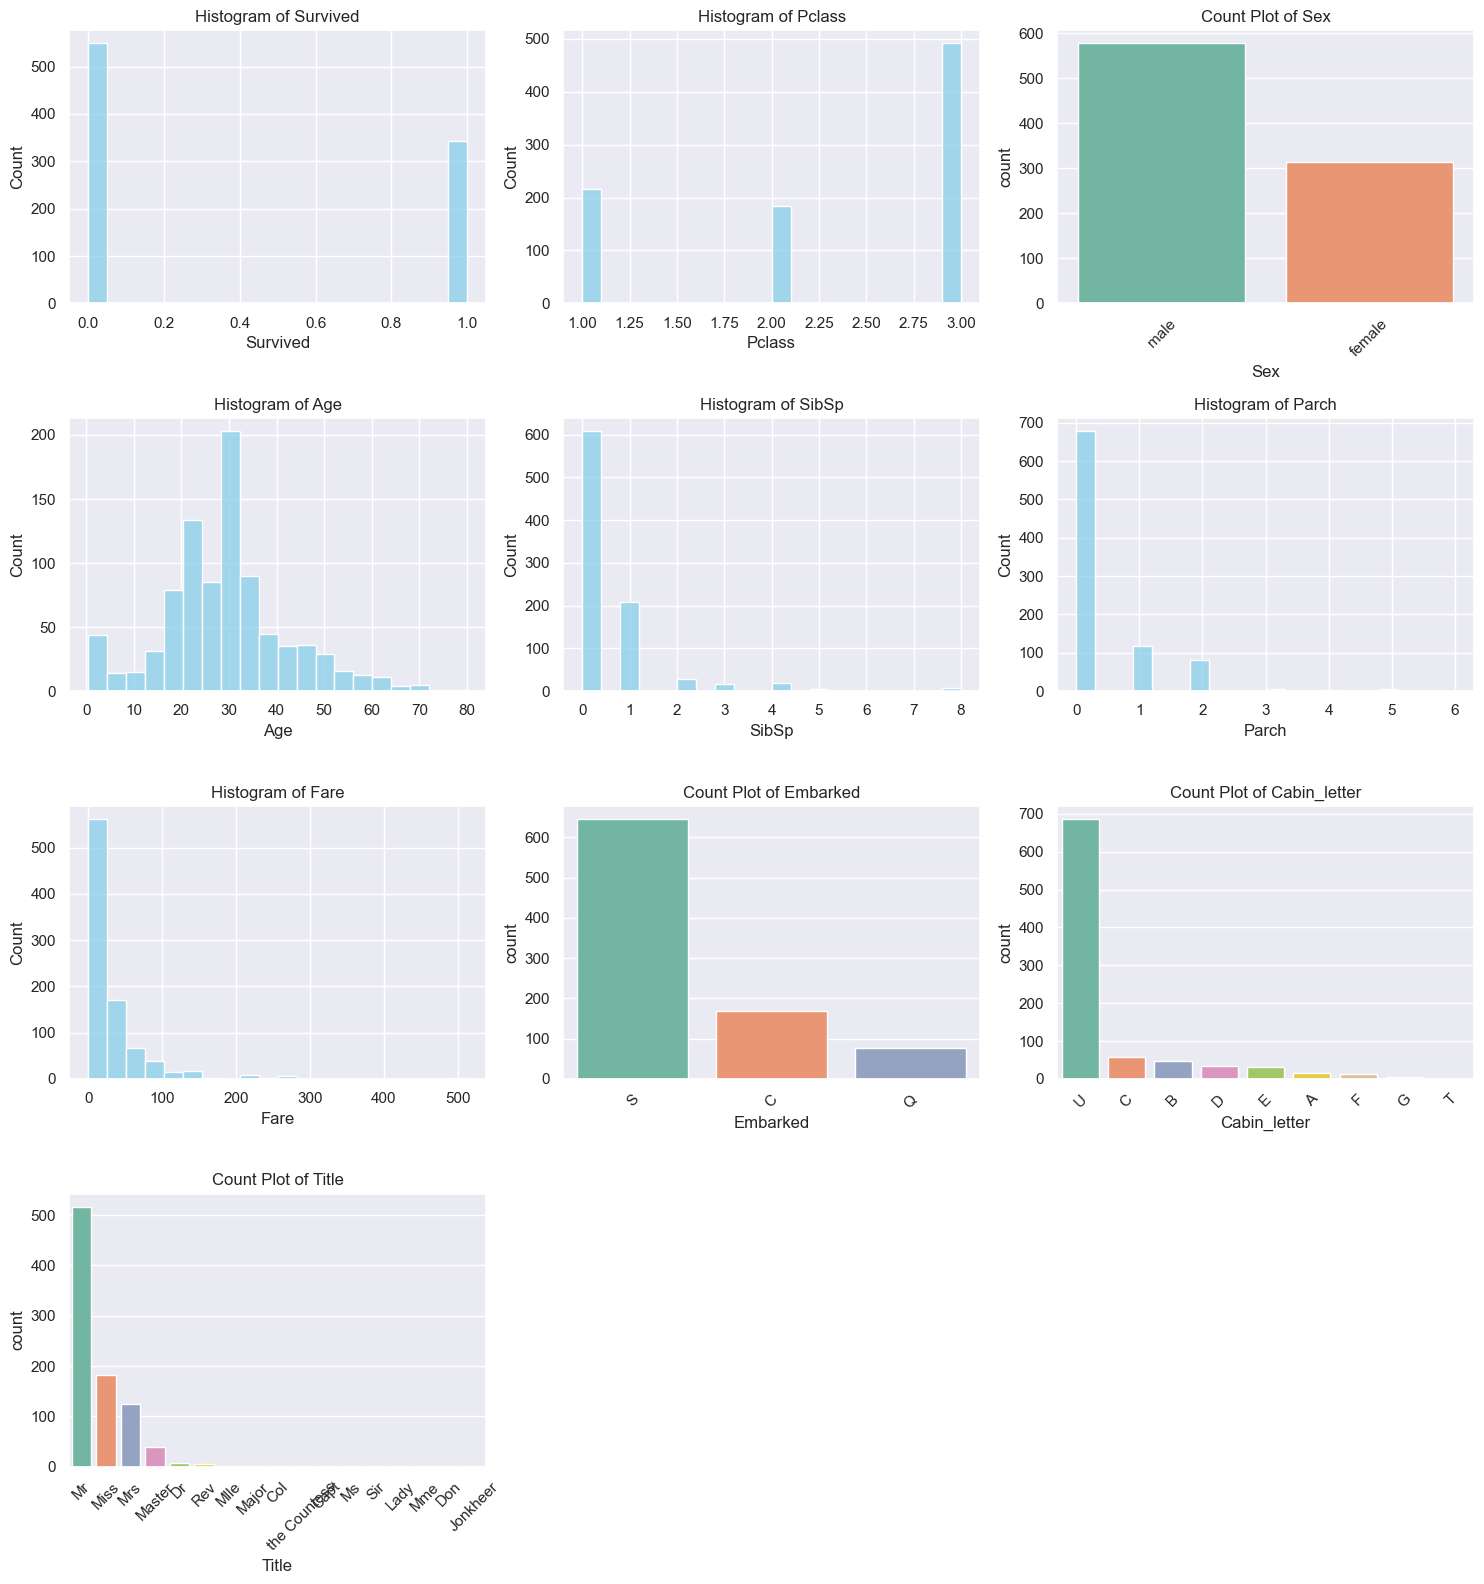

In [75]:
# Set number of plots per row
list_of_attributes = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',  'Parch', 'Fare', 'Embarked', 'Cabin_letter', 'Title', ]
n_cols = 3
n_plots = len(list_of_attributes)
n_rows = (n_plots + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()


for i, col in enumerate(list_of_attributes):
    ax = axes[i]
    if df[col].dtype in ['int64', 'float64']:   # this is a numeric attribute
        sns.histplot(df[col].dropna(), bins=20, ax=ax, kde=False, color='skyblue')
        ax.set_title(f"Histogram of {col}")
    else:
        sns.countplot(data=df, x=col, ax=ax, palette='Set2', order=df[col].value_counts().index)
        ax.set_title(f"Count Plot of {col}")
        ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [78]:
df.isnull().sum()[df.isnull().sum() > 0]


Series([], dtype: int64)

## Correlations

<Axes: >

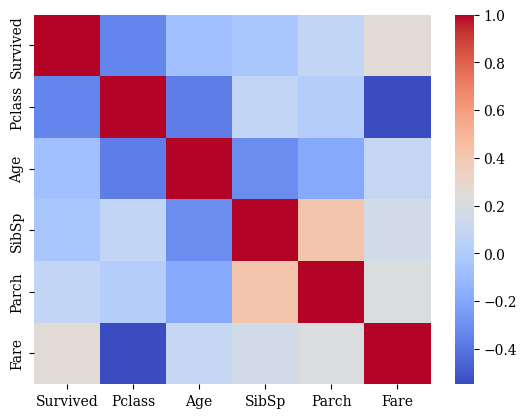

In [30]:
list_of_attributes = ['Survived', 'Pclass', 'Age', 'SibSp',  'Parch', 'Fare', ]

corr = df[list_of_attributes].corr()
sns.heatmap(corr, cmap = 'coolwarm', annot=False)

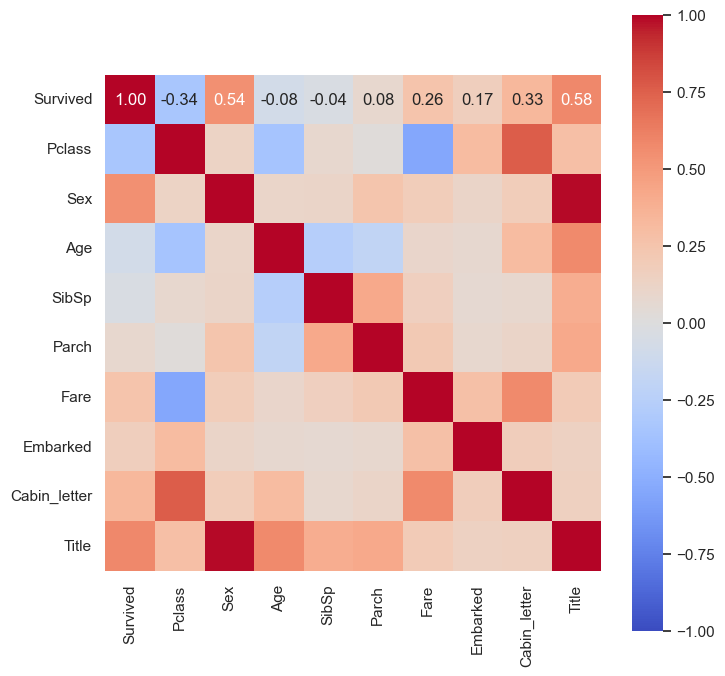

Correlation with Survived attribute:
Survived        1.000000
Title           0.580281
Sex             0.543351
Cabin_letter    0.333610
Fare            0.257307
Embarked        0.170707
Parch           0.081629
SibSp          -0.035322
Age            -0.078816
Pclass         -0.338481
Name: Survived, dtype: float64


In [80]:
list_of_attributes = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',  'Parch', 'Fare', 'Embarked', 'Cabin_letter', 'Title', ]

try:
    from dython.nominal import associations
    assoc = associations(df[list_of_attributes], figsize=(8, 8), cmap = 'coolwarm')
    print("Correlation with Survived attribute:")
    print(assoc['corr']['Survived'].sort_values(ascending=False))
except ModuleNotFoundError:
    print("module 'dython' is not installed")